In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [13]:
m = 105.658 # m_mu (MeV)
m_e = 0.511 # m_el (MeV)
s1 = (2.5*m)**2
s2 = (2.7*m)**2
s3 = (3*m)**2
n_events = int(1e7)
bins = 100
theta_random = np.random.uniform(0, np.pi, n_events)
phi_random = np.random.uniform(0, 2*np.pi, n_events)
E = np.sqrt(s1)/2 # energy in the c.o.m (equal for every particle)

In [14]:
########## Functions ###########


# def differential_xs(theta, s):
#   ds = sp.constants.alpha **2/(4*s) * np.sqrt(1-4*m**2/s) * ((1+4*m**2/s)+ (1-4*m**2/s)*np.cos(theta)**2)*nbarn_conv
  
#   return ds

def differential_xs(theta, s):
    alpha = 1/137.036
    m = 105.658 # MeV
    hbarc2_to_nb = 3.89379e11
    beta = np.sqrt(1 - 4*m**2/s)
    ds_nat = (alpha**2 / (4 * s)) * beta * ((1 + 4*m**2/s) + (1 - 4*m**2/s) * np.cos(theta)**2)
    return ds_nat * hbarc2_to_nb


def px_component(s, m, theta, phi):
    return np.sqrt(s/4 - m**2) * np.sin(theta) * np.cos(phi)

def py_component(s, m, theta, phi):
    return np.sqrt(s/4 - m**2) * np.sin(theta) * np.sin(phi)

def pz_component(s, m, theta):
  return np.sqrt(s/4-m**2)*np.cos(theta)

def pt_component(s, m, theta):
   return np.sqrt(s/4 - m**2) * np.sin(theta)

def weights(theta, s):
  w = differential_xs(theta, s)*np.sin(theta)
  return w


def boost_cm_to_lab(s, m, m_e, E, pz):
   E2 = (s-2*m_e**2)/(2*m_e)
   beta = np.sqrt(E2**2-m_e**2)/(E2 + m_e)
   gamma = 1/np.sqrt(1-beta**2)
   pz_lab = gamma*(pz+beta*E)
   E_lab = gamma*(E+beta*pz)
   # px, py unchanged because boost on z axis
   return E_lab, pz_lab

def histo(variable, bins, weights, var_name, unit):

    fig, ax = plt.subplots(dpi=150)
    ax.hist(variable, bins = bins, weights=weights, alpha = 0.7, color = 'blue', density = True)
    ax.set_xlabel(rf'${var_name} \, ({unit})$')
    ax.set_ylabel('Counts')
    ax.set_title(rf'${var_name}$ Distribution')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)

    # Se vuoi che i minor ticks siano visibili ma discreti
    ax.tick_params(axis='both', which='minor', length=4)
    ax.tick_params(axis='both', which='major', length=7)

    plt.show()





(array([ 522971.,  531891.,  546458.,  573558.,  611524.,  671051.,
         768677.,  932354., 1280931., 3560585.]),
 array([1.00611376e-05, 7.31061705e+00, 1.46212240e+01, 2.19318310e+01,
        2.92424380e+01, 3.65530450e+01, 4.38636520e+01, 5.11742590e+01,
        5.84848660e+01, 6.57954730e+01, 7.31060800e+01]),
 <BarContainer object of 10 artists>)

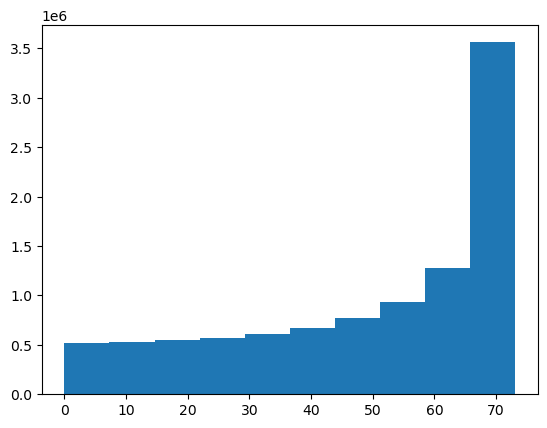

In [15]:
# check ok
plt.hist(weights(theta_random, s1))

In [16]:
####### Momentum calculation (c.m.) #######

pz = pz_component(s1, m, theta_random)
px = px_component(s1, m, theta_random, 1)
py = py_component(s1, m, theta_random, 1)
pt = pt_component(s1, m, theta_random)


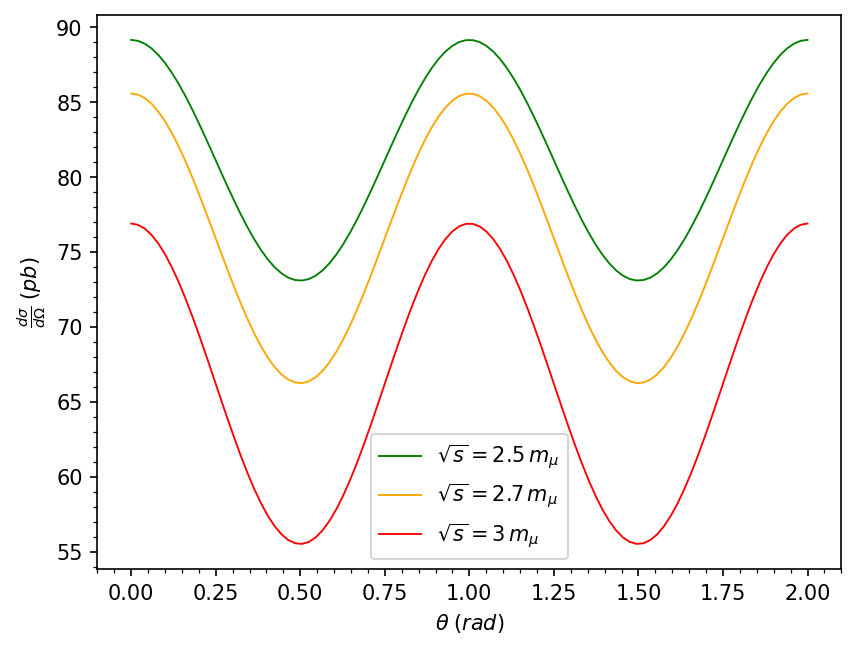

In [17]:
############# XS vs THETA #############

fig, ax = plt.subplots(dpi=150)
theta = np.linspace(0, 2*np.pi, 100)

ax.plot(theta/np.pi, differential_xs(theta, s1), label = r'$\sqrt{s} = 2.5 \, m_{\mu}$', color = 'green', lw = '0.9') # it correctly scales as 1/s
ax.plot(theta/np.pi, differential_xs(theta, s2), label = r'$\sqrt{s} = 2.7 \, m_{\mu}$', color = 'orange', lw = '0.9')
ax.plot(theta/np.pi, differential_xs(theta, s3), label = r'$\sqrt{s} = 3 \, m_{\mu}$', color = 'red', lw = '0.9')

ax.set_xlabel(r"$\theta \; (rad)$")
ax.set_ylabel(r"$\frac{d\sigma}{d\Omega} \; (pb)$")
ax.minorticks_on()
ax.legend()
# ax.title('')

plt.show()

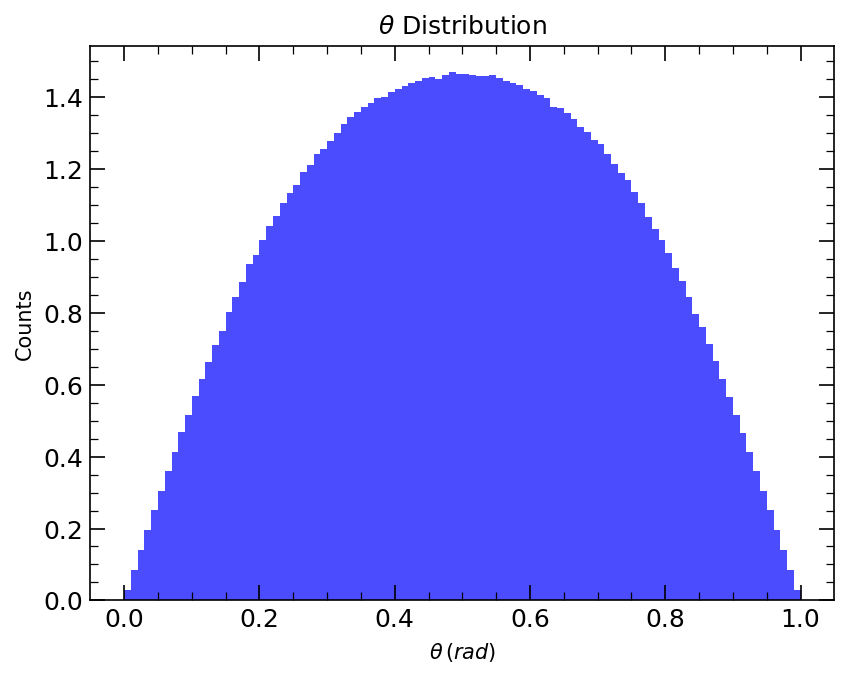

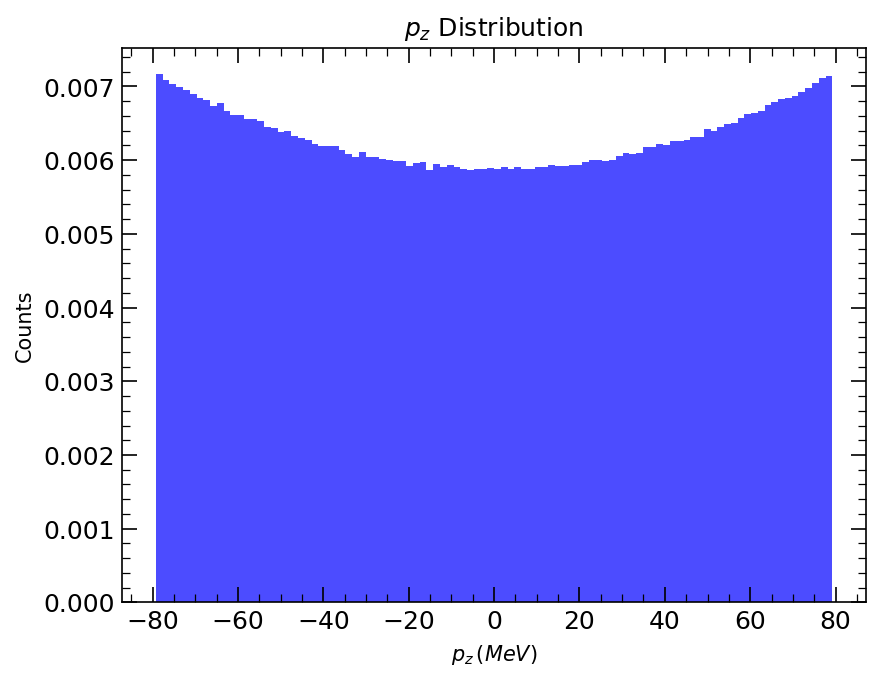

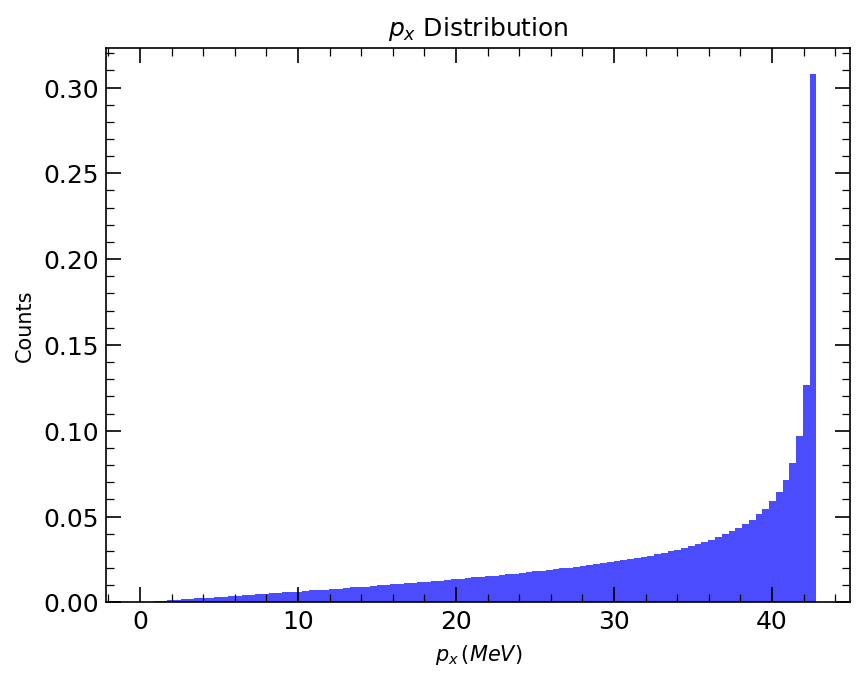

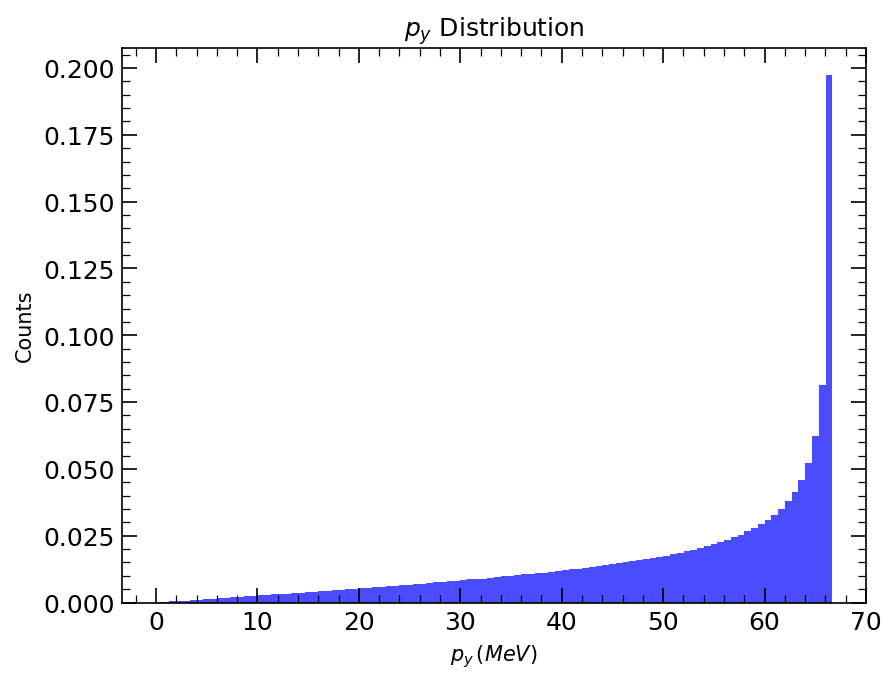

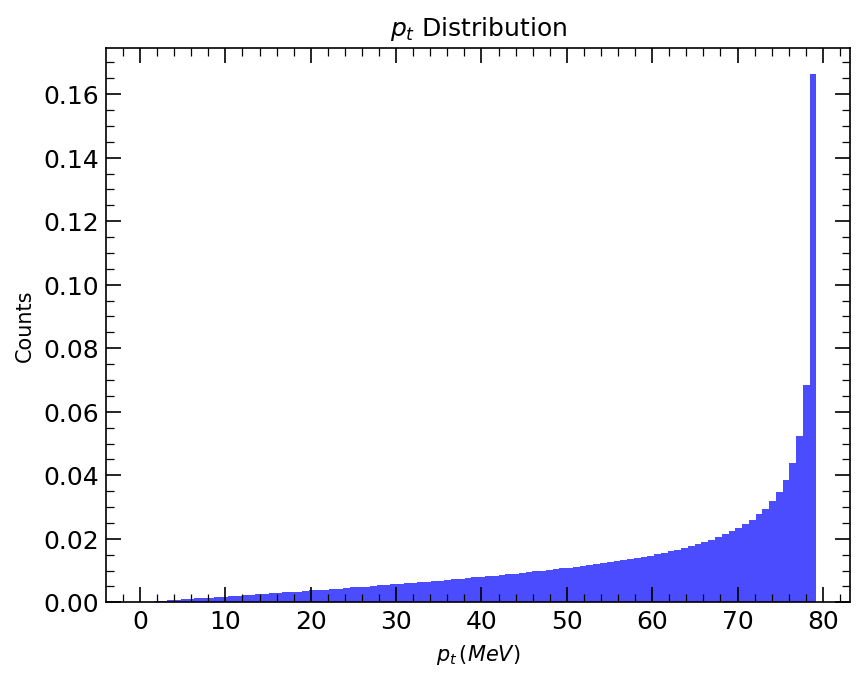

In [18]:
w =  weights(theta_random, s1)


histo(theta_random/np.pi, bins, w, r'\theta', 'rad' )
histo(pz, bins, w, 'p_z', 'MeV' )
histo(px, bins, w, 'p_x', 'MeV' )
histo(py, bins, w, 'p_y', 'MeV' )
histo(pt, bins, w, 'p_t', 'MeV' )







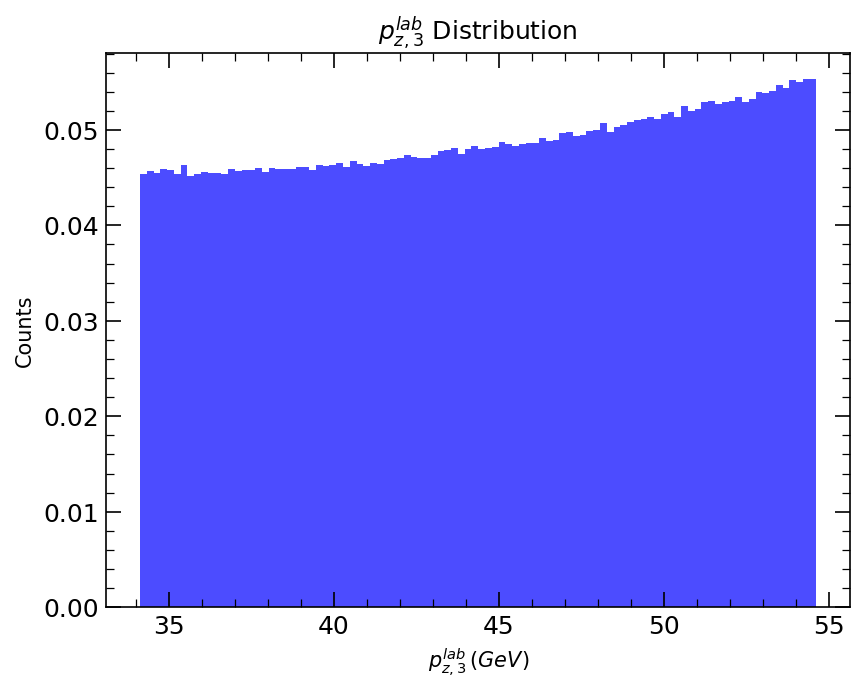

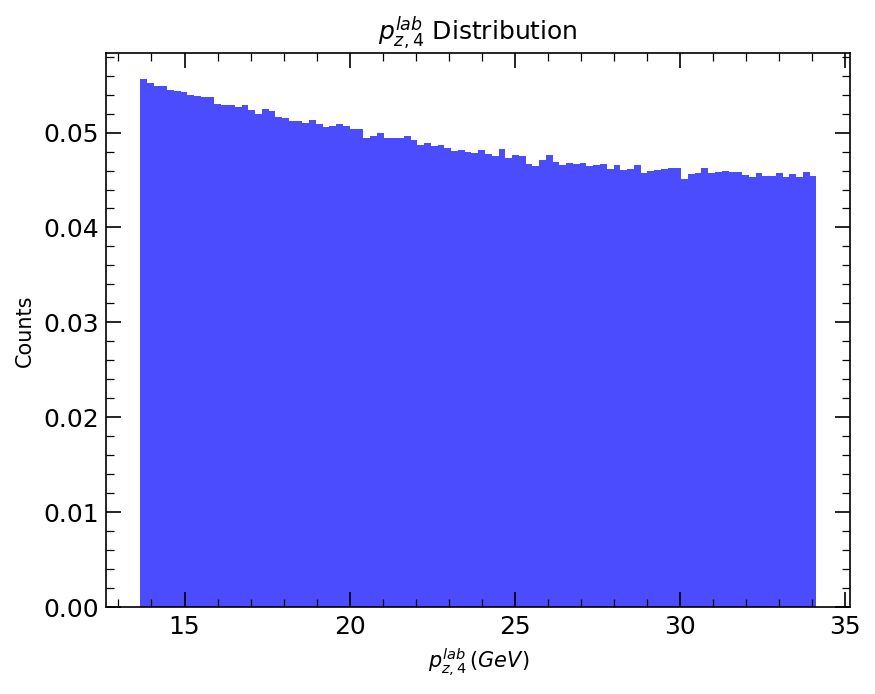

In [19]:
############### Z-AXIS BOOST ##############


mask3 = pz>0
E_3, pz3 = boost_cm_to_lab(s1, m, m_e, E, pz[mask3])
histo(pz3/1e3, bins, w[mask3], 'p_{z,3}^{lab}', 'GeV' )

mask4 = pz<0
E_4, pz4 = boost_cm_to_lab(s1, m, m_e, E, pz[mask4])
histo(pz4/1e3, bins, w[mask4], 'p_{z,4}^{lab}', 'GeV' )
